## Simulating the spin model:

In [7]:
from ising_utils import *

In [8]:
def bornholdt_field(model, i):
    """Compute the local field at spin i"""
    total_neighbors = np.sum(model.connection_matrix[i] * model.spins)
    magnetization = np.sum(model.spins) / len(model.spins)
    return model.J * total_neighbors - model.alpha * model.spins[i] * magnetization

Running simulation with 1024 spins, J=1, alpha=4, T=1.5, steps=5000
Step 0/5000
Step 500/5000
Step 1000/5000
Step 1500/5000
Step 2000/5000
Step 2500/5000
Step 3000/5000
Step 3500/5000
Step 4000/5000
Step 4500/5000
Simulation finished


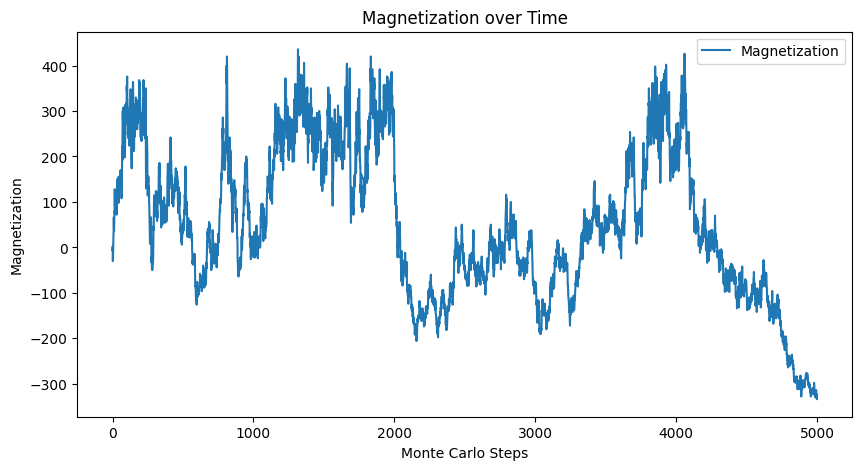

interactive(children=(IntSlider(value=0, description='t', max=4999), Output()), _dom_classes=('widget-interact…

In [22]:
# Running the simulation
model = LatticeSpinMarketModel(side=32, dim=2, J=1, alpha=4, T=1.5, steps=5000, local_field_func=bornholdt_field)
spin_series = model.run_simulation(verbose=True)
model.plot_magnetization(spin_series)
model.plot_lattice(spin_series=spin_series, interactive=True)

In the paper, it is not clear how the logarithmic relative change $\text{ret}(t)=\ln(M(t))-\ln(M(t-1))$ is defined, considering that $M(t)$ can have negative values. We test shifting all its values up by its minimum possible value, and using its absolute value.

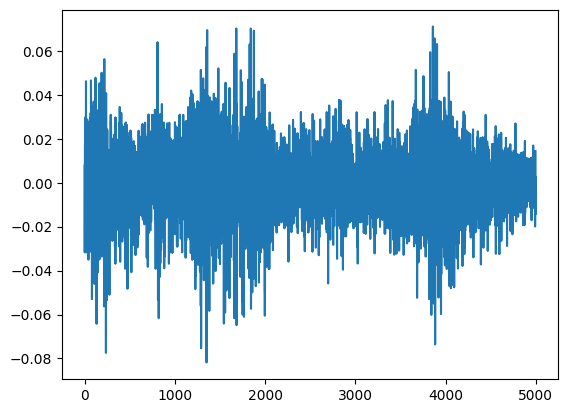

In [24]:
min_magnetization = -32**2

magnetization_series_shifted = [np.sum(spin) -min_magnetization for spin in spin_series]

log_returns = np.diff(np.log(magnetization_series_shifted))

plt.plot(log_returns)

/var/folders/2n/ywnb5cc17zq6c5n2w2n7bkzw0000gn/T/ipykernel_45685/1451387972.py:3: RuntimeWarning: divide by zero encountered in log
  log_returns = np.diff(np.log(abs_magnetization_series))
/Users/edoardoghirardo/miniconda/envs/thesis/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1496: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


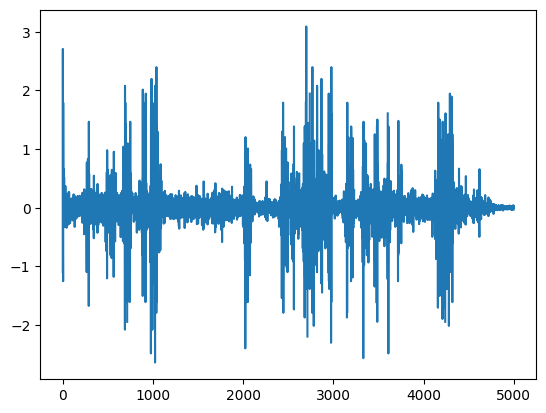

In [25]:
abs_magnetization_series = [abs(np.sum(spin)) for spin in spin_series]

log_returns = np.diff(np.log(abs_magnetization_series))

plt.plot(log_returns)